# Linear regression (w/gradient descent)

**Initial setup**

In [1]:
# Import relevant Python packages
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Create training data
X_train = np.array([10, 4, 3, 6, 9, 11, 3, 4])
y_train = np.array([23, 11, 9, 15, 21, 25, 9, 11])

**Simplest manual approach (intuition)**

In [3]:
# Set the parameters manually
w = 1
b = 0
m = X_train.shape[0]

# Predict y and compute cost
y_pred = np.zeros(m)
cost = 0
for i in range(m):
    y_pred[i] = w*X_train[i] + b
    cost = cost + (y_pred[i] - y_train[i]) ** 2

cost = cost/m 
print(f"Total cost is {cost:.3f}.")

Total cost is 95.000.


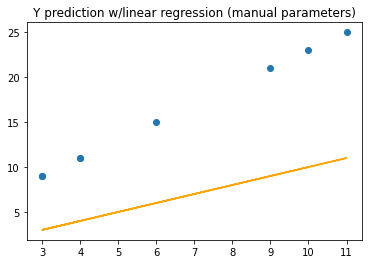

In [4]:
# Plot y predictions
plt.scatter(X_train, y_train)
plt.plot(X_train, y_pred, color='orange')
plt.title("Y prediction w/linear regression (manual parameters)")
plt.show()

**Implementation with gradient descent**

In [7]:
# Set parameters
w = 0
b = 0
m = X_train.shape[0]

n_iter = 10_000         # number of interations
lr = 0.01              # learning rate
hist_cost = []         # function cost 
early_stop = 0.00001   # minimum improvement between iterations

# Predict y and compute cost
dj_dw = 0
dj_db = 0

for iter in range(n_iter):
    # Apply gradient descent
    for i in range(m):
        f_wb_i = w * X_train[i] + b 
        dj_dw_i = (f_wb_i - y_train[i]) * X_train[i] 
        dj_db_i = (f_wb_i - y_train[i])

        dj_dw = dj_dw + dj_dw_i 
        dj_db = dj_db + dj_db_i 

    dj_dw = dj_dw * (1/m) 
    dj_db = dj_db * (1/m)

    # Update coefficients
    w = w - lr * dj_dw 
    b = b - lr * dj_db 

    # Predict y and compute cost
    y_pred = np.zeros(m)
    cost = 0
    for j in range(m):
        y_pred[j] = w*X_train[j] + b
        cost = cost + (y_pred[j] - y_train[j]) ** 2

    cost = cost/m 
    if iter % 100 == 0:
        print(f"Iteration {iter}: w = {w:.3f}; b = {b:.3f}; Total cost is {cost:.3f}.")

    # Early stop
    hist_cost.append(cost)
    if iter > 0 and hist_cost[iter-1] - hist_cost[iter] < early_stop:
        print(f"Final iteration was {iter}: w = {w:.3f}; b = {b:.3f}; Total cost is {cost:.3f}.")
        break

Iteration 0: w = 1.157; b = 0.155; Total cost is 72.481.
Iteration 100: w = 2.280; b = 0.838; Total cost is 0.909.
Iteration 200: w = 2.225; b = 1.264; Total cost is 0.587.
Iteration 300: w = 2.180; b = 1.605; Total cost is 0.379.
Iteration 400: w = 2.145; b = 1.880; Total cost is 0.244.
Iteration 500: w = 2.116; b = 2.100; Total cost is 0.158.
Iteration 600: w = 2.094; b = 2.277; Total cost is 0.102.
Iteration 700: w = 2.075; b = 2.419; Total cost is 0.066.
Iteration 800: w = 2.060; b = 2.533; Total cost is 0.042.
Iteration 900: w = 2.048; b = 2.625; Total cost is 0.027.
Iteration 1000: w = 2.039; b = 2.699; Total cost is 0.018.
Iteration 1100: w = 2.031; b = 2.758; Total cost is 0.011.
Iteration 1200: w = 2.025; b = 2.806; Total cost is 0.007.
Iteration 1300: w = 2.020; b = 2.844; Total cost is 0.005.
Iteration 1400: w = 2.016; b = 2.875; Total cost is 0.003.
Final iteration was 1468: w = 2.014; b = 2.892; Total cost is 0.002.


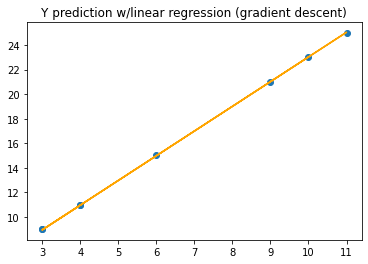

In [8]:
# Plot y predictions
plt.scatter(X_train, y_train)
plt.plot(X_train, y_pred, color='orange')
plt.title("Y prediction w/linear regression (gradient descent)")
plt.show()